In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

# Load Data

In [76]:
df= pd.read_csv('train.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [78]:
columns_to_drop=['EngineVersion',
 'AppVersion',
 'SignatureVersion',
 'Processor',
 'OSBuildLab',
 'NumericOSVersion',
 'DateAS',
 'DateOS']

In [79]:

present_columns=['NumAntivirusProductsInstalled',
 'Processor',
 'MDC2FormFactor',
 'OSArchitecture']
new_df = df[present_columns]

In [80]:
for col in present_columns:
    print(col, "-->", new_df[col].unique())

NumAntivirusProductsInstalled --> [ 1.  2.  3.  4. nan  5.]
Processor --> ['x86' 'x64' 'arm64']
MDC2FormFactor --> ['SmallTablet' 'AllInOne' 'Desktop' 'Notebook' 'LargeTablet' 'Convertible'
 'Detachable' 'PCOther' 'SmallServer' 'LargeServer' 'MediumServer']
OSArchitecture --> ['x86' 'amd64' 'arm64']


In [81]:
df.target.value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

In [82]:
df = df.drop(columns=columns_to_drop)

In [83]:
df.isna().sum()

MachineID                             0
ProductName                           0
IsBetaUser                            0
RealTimeProtectionState              66
IsPassiveModeEnabled                  0
                                   ... 
IsPenCapable                          0
IsAlwaysOnAlwaysConnectedCapable    134
IsGamer                             559
RegionIdentifier                    559
target                                0
Length: 68, dtype: int64

In [84]:
df.duplicated().sum()

165

In [85]:
df=df.drop_duplicates()

In [86]:
df.duplicated().sum()

0

In [87]:
df.columns

Index(['MachineID', 'ProductName', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'OSVersion', 'OSBuildNumber', 'OSProductSuite',
       'OsPlatformSubRelease', 'SKUEditionName', 'IsSystemProtected',
       'AutoSampleSubmissionEnabled', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'MDC2FormFactor', 'DeviceFamily',
       'OEMNameID', 'OEMModelID', 'ProcessorCoreCount',
       'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB',
       'PrimaryDiskType', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'PowerPlatformRole',
       'InternalBatteryNumberOfCharges', 'OSArchitec

# train test split

In [88]:
X = df.drop("target", axis="columns")
y = df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head(2)

,MachineID,ProductName,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
80629,49434133ccae28a991edd4bb5f943b86,win8defender,0,7.00,0,53447.00,1.00,1.00,1,18,...,554.00,33060.00,0,0.00,0,0,0.00,0.00,1.00,1
11123,95a360d560a96afd3399c6c7700bdd8e,win8defender,0,7.00,0,47238.00,2.00,1.00,1,68,...,500.00,16815.00,0,0.00,0,0,0.00,1.00,12.00,0


# missing values and duplicates values

In [89]:
df_train.isna().sum()

MachineID                             0
ProductName                           0
IsBetaUser                            0
RealTimeProtectionState              46
IsPassiveModeEnabled                  0
                                   ... 
IsPenCapable                          0
IsAlwaysOnAlwaysConnectedCapable    101
IsGamer                             415
RegionIdentifier                    415
target                                0
Length: 68, dtype: int64

In [90]:
columns_continuous = df_train.select_dtypes(include=np.number).columns  

columns_categorical = df_train.select_dtypes(exclude=np.number).columns

In [91]:
df_train[columns_continuous] = df_train[columns_continuous].apply(lambda col: col.fillna(col.mean()))

df_train[columns_categorical] = df_train[columns_categorical].apply(lambda col: col.fillna(col.mode()[0]))

In [92]:
df_test[columns_continuous] = df_train[columns_continuous].apply(lambda col: col.fillna(col.mean()))

df_test[columns_categorical] = df_train[columns_categorical].apply(lambda col: col.fillna(col.mode()[0]))

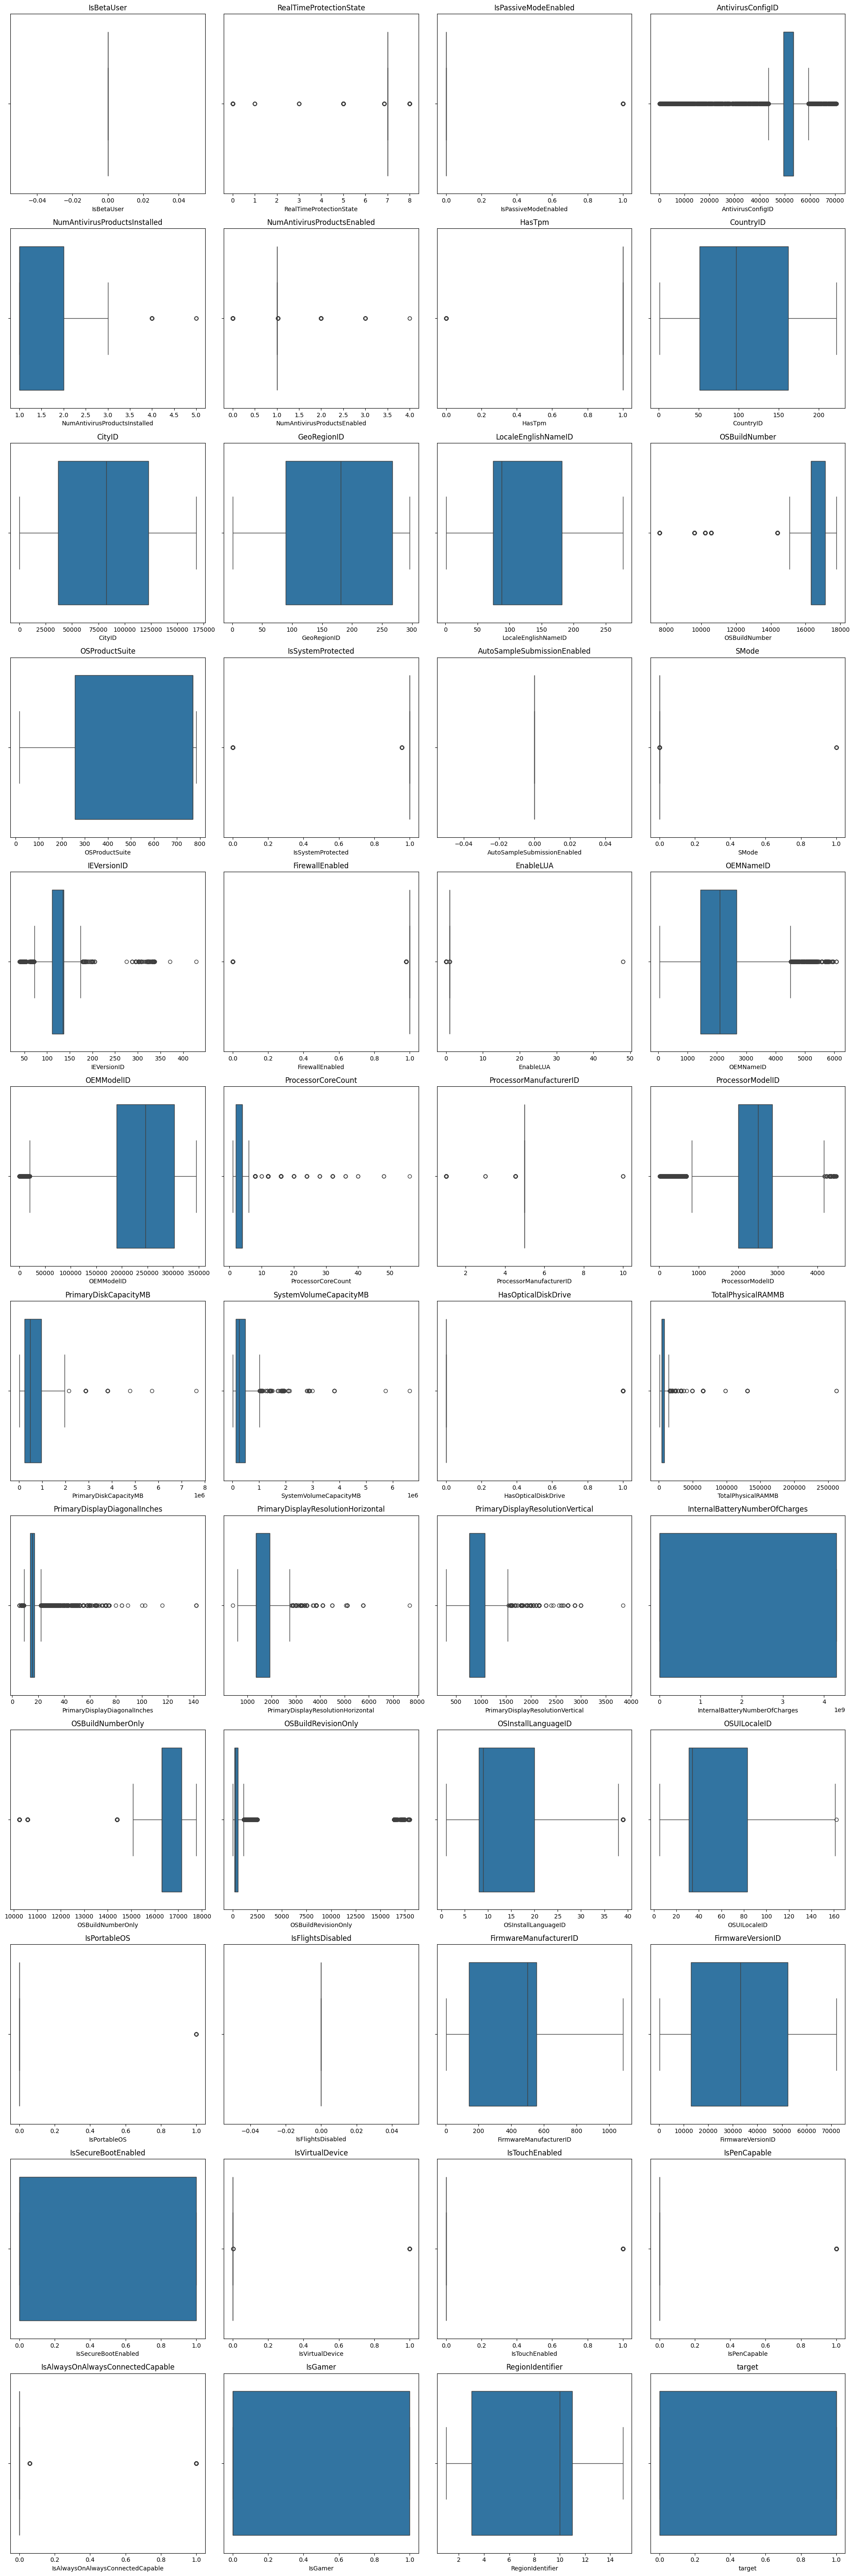

In [40]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

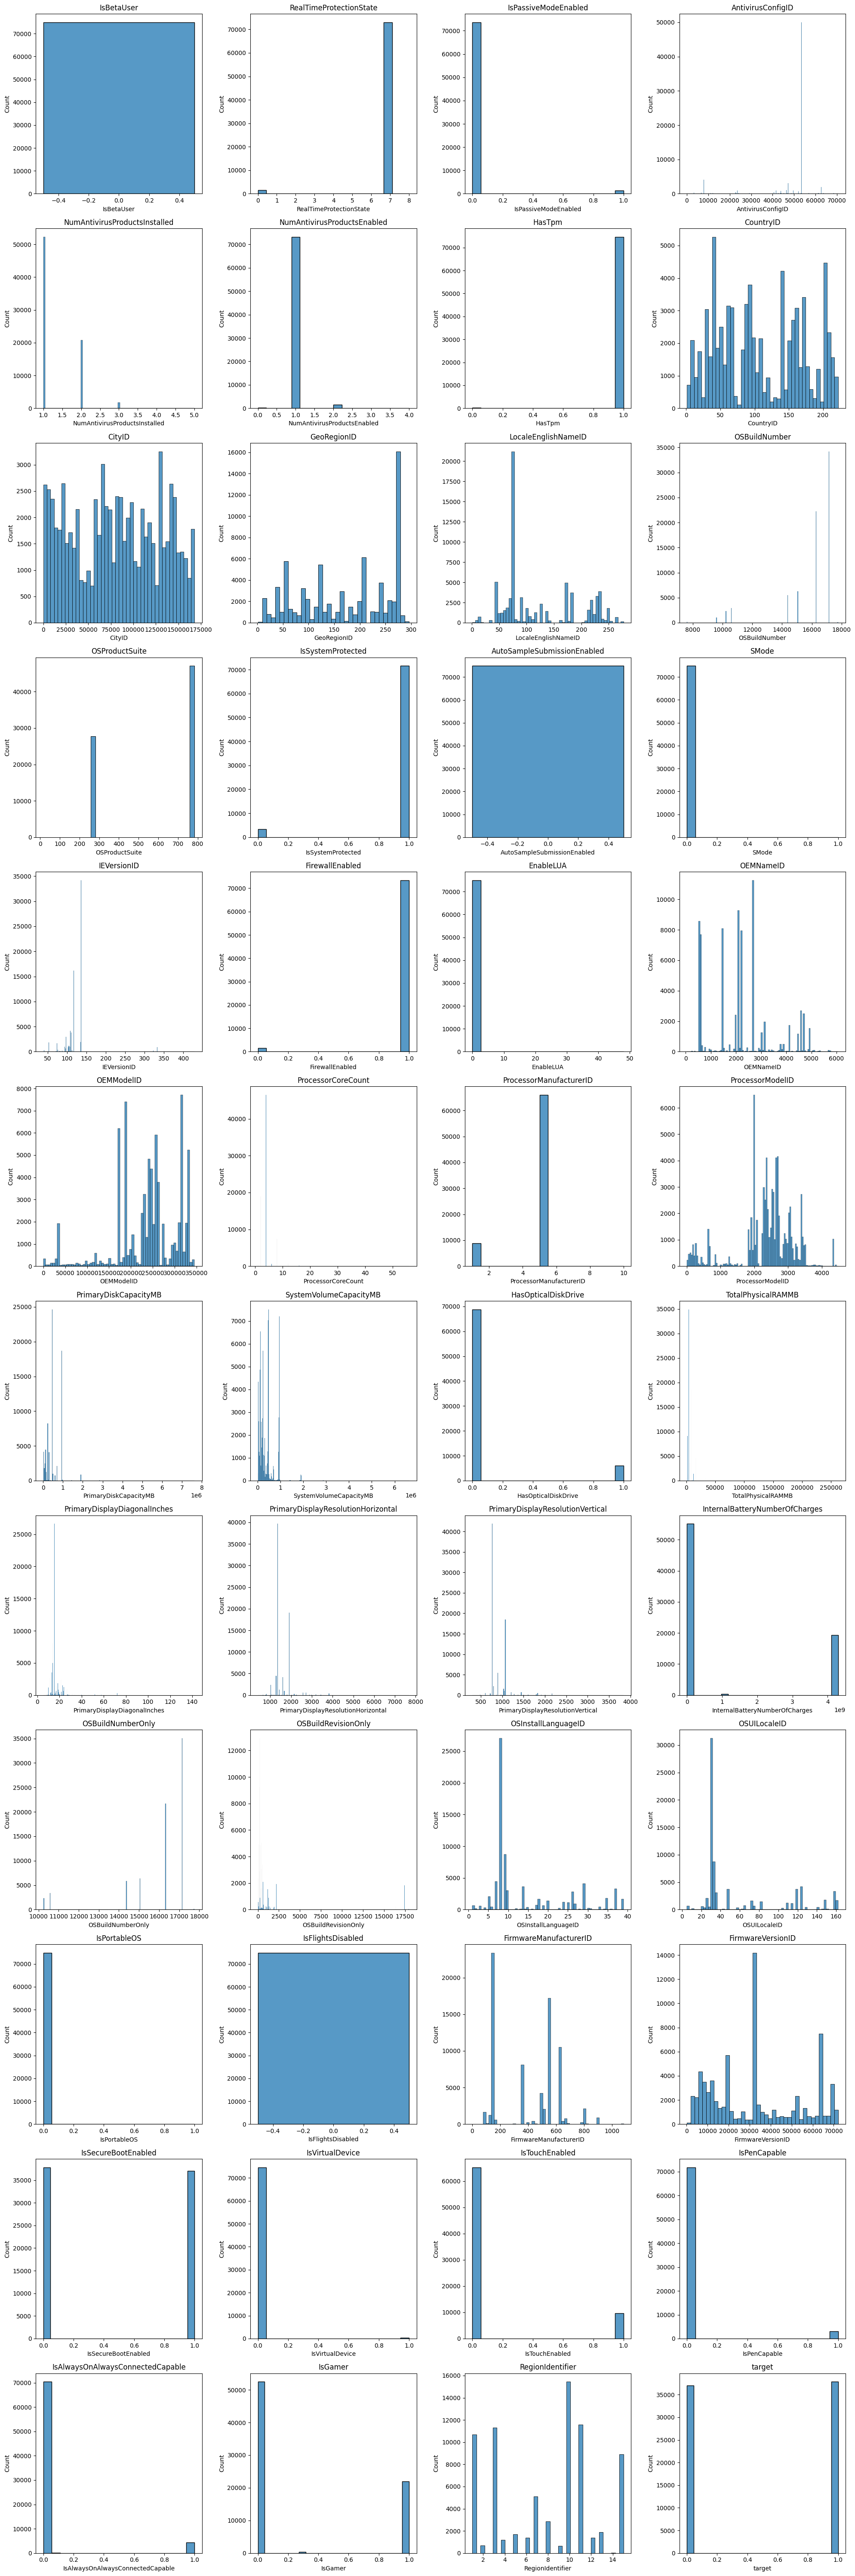

In [41]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [93]:
for col in columns_categorical:
    print(col, "-->", df_train[col].unique())

MachineID --> ['49434133ccae28a991edd4bb5f943b86' '95a360d560a96afd3399c6c7700bdd8e'
 '7b7073fbc16d65d0bd9e621c7a733102' ... 'c252cb1b19b70b7f87957f645983e83a'
 'bd593ad3f5150eb06634fb3a127e85a9' '7336beede0f6c93c70eebf80f9aa6d9a']
ProductName --> ['win8defender' 'mse']
PlatformType --> ['windows10' 'windows8' 'windows7' 'windows2016']
OSVersion --> ['10.0.0.0' '6.3.0.0' '6.1.1.0' '10.0.1.0' '10.0.3.0' '10.0.2.0'
 '10.0.4.0']
OsPlatformSubRelease --> ['rs4' 'rs2' 'rs3' 'th1' 'rs1' 'th2' 'windows8.1' 'windows7' 'prers5']
SKUEditionName --> ['Pro' 'Home' 'Enterprise LTSB' 'Education' 'Enterprise' 'Cloud' 'Invalid'
 'Server']
MDC2FormFactor --> ['Notebook' 'Desktop' 'Convertible' 'AllInOne' 'Detachable' 'PCOther'
 'LargeTablet' 'SmallTablet' 'SmallServer' 'MediumServer' 'LargeServer']
DeviceFamily --> ['Windows.Desktop' 'Windows.Server']
PrimaryDiskType --> ['HDD' 'UNKNOWN' 'SSD' 'Unspecified']
ChassisType --> ['Notebook' 'LowProfileDesktop' 'Desktop' 'MiniTower' 'Laptop' 'HandHeld'
 'Por

/tmp/ipykernel_55764/760990726.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[col][df_train['target']==0], fill=True, label='target=0', color='red')
/tmp/ipykernel_55764/760990726.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[col][df_train['target']==1], fill=True, label='target=1')
/tmp/ipykernel_55764/760990726.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[col][df_train['target']==0], fill=True, label='target=0', color='red')
/tmp/ipykernel_55764/760990726.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[col][df_train['target']==1], fill=True, label='target=1')


ValueError: num must be an integer with 1 <= num <= 24, not 25

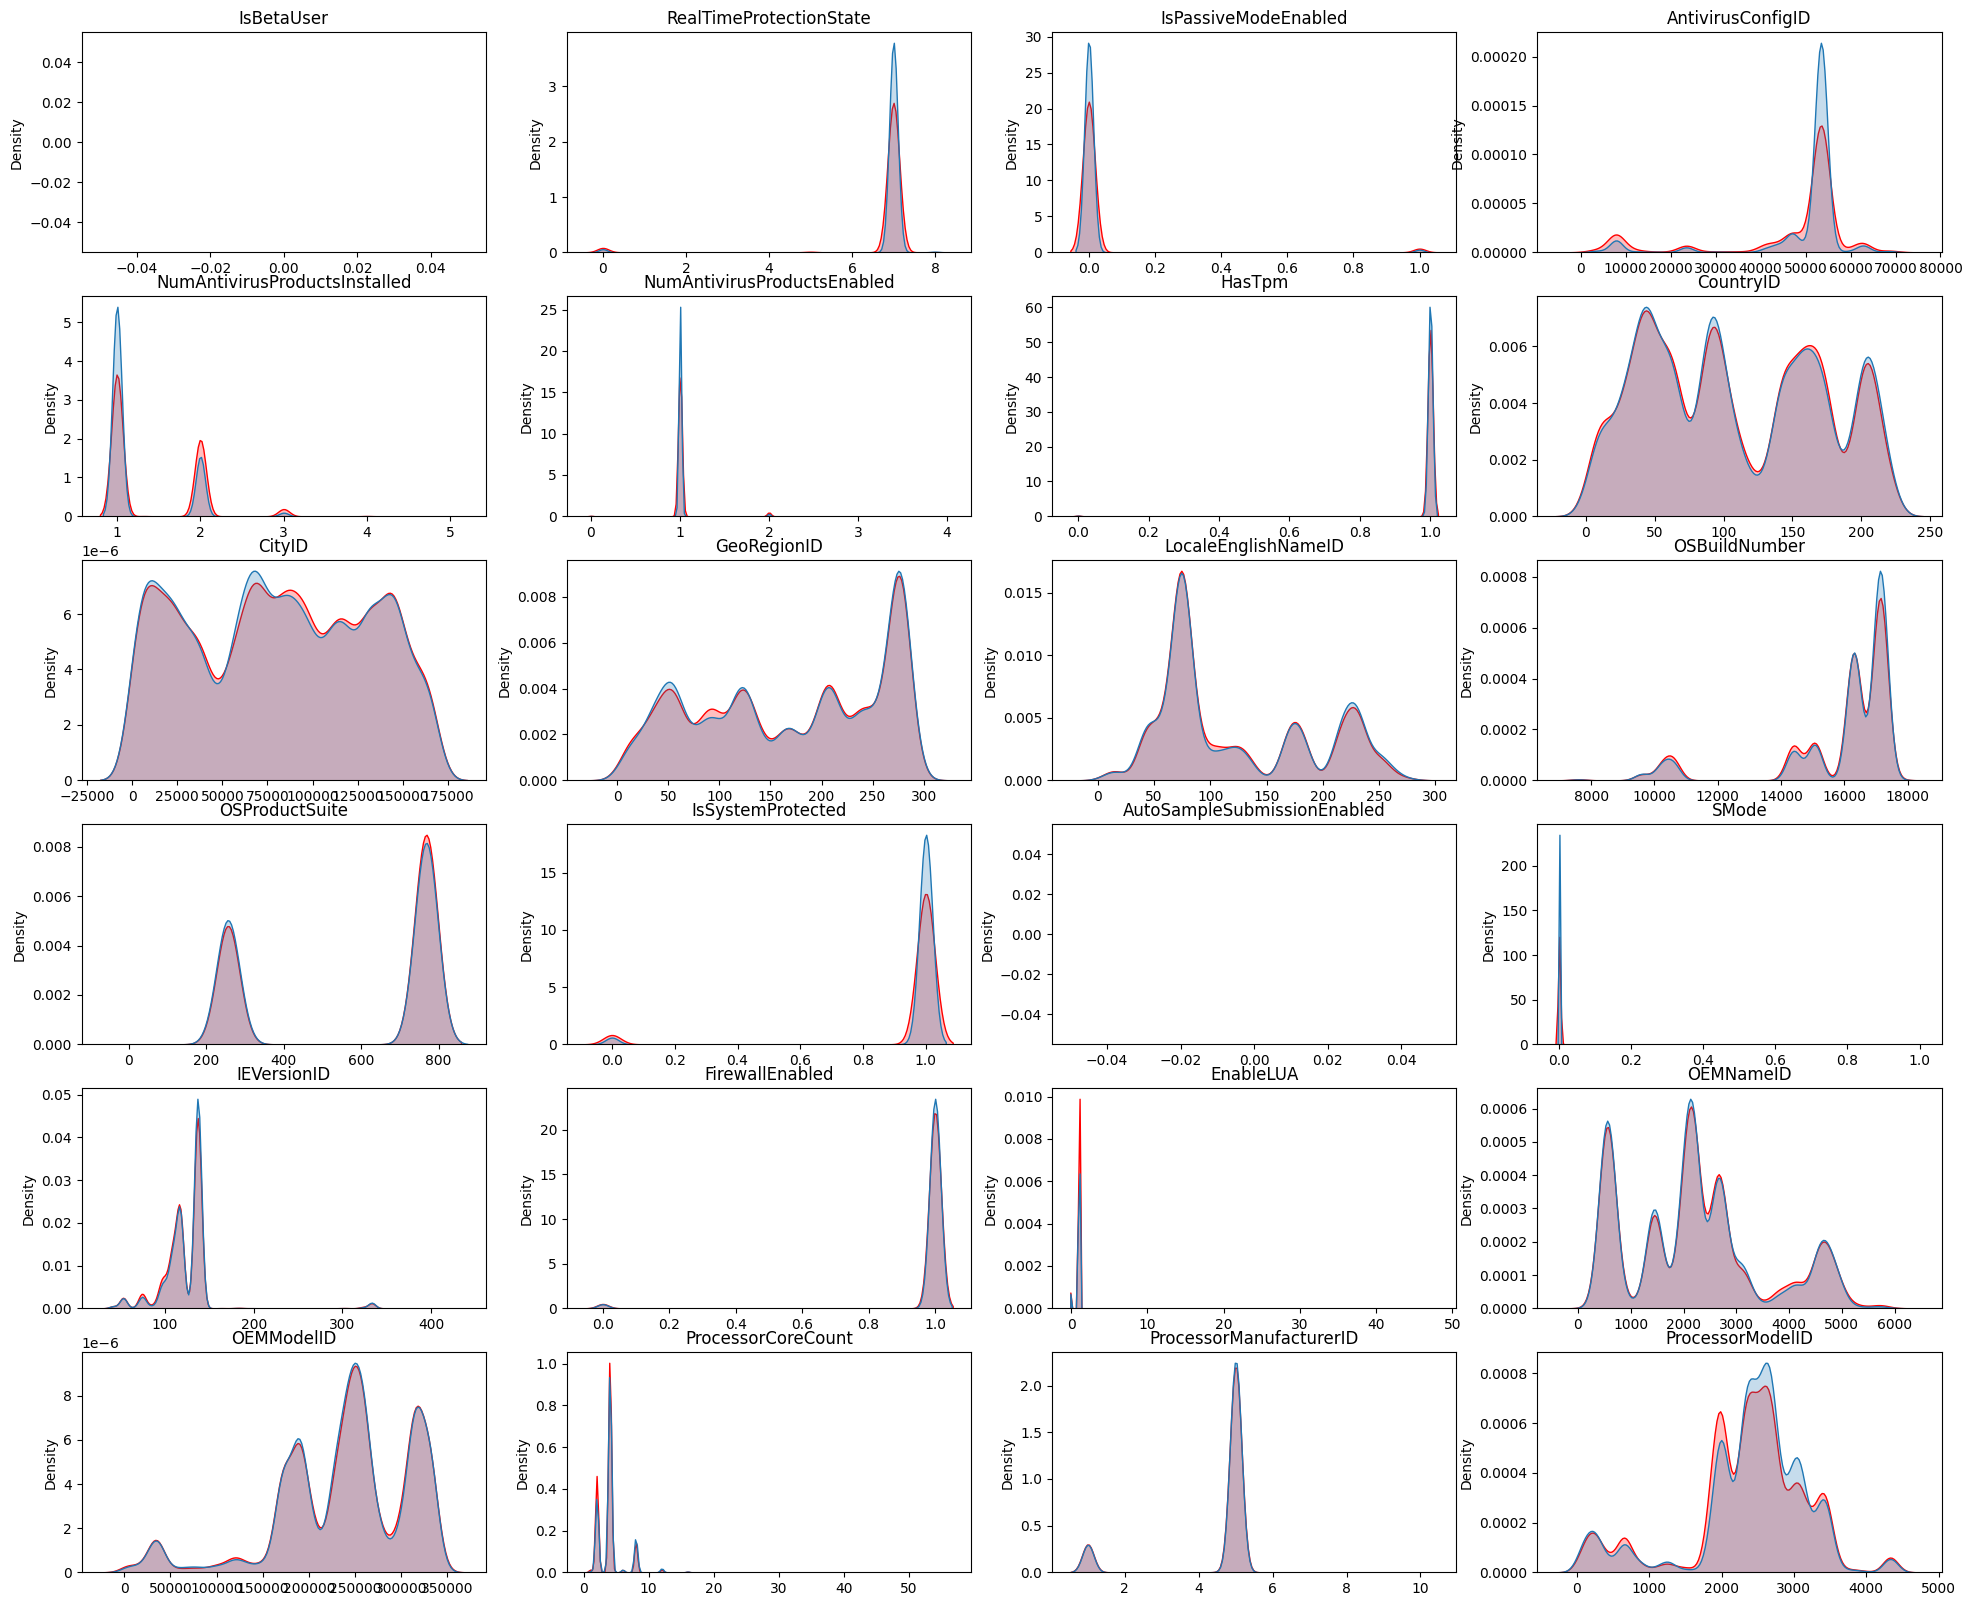

In [94]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train[col][df_train['target']==0], fill=True, label='target=0', color='red')
    sns.kdeplot(df_train[col][df_train['target']==1], fill=True, label='target=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

In [99]:
X_train = df_train.drop('target', axis='columns')
y_train = df_train['target']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,IsPassiveModeEnabled,NumAntivirusProductsInstalled,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSProductSuite,SMode,IEVersionID,OEMNameID,...,IsPortableOS,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
count,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00,...,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00,74876.00
mean,0.02,0.08,0.48,0.48,0.57,0.44,0.73,0.00,0.22,0.36,...,0.00,0.37,0.46,0.49,0.00,0.13,0.04,0.06,0.30,0.49
std,0.13,0.13,0.29,0.29,0.30,0.25,0.32,0.02,0.09,0.22,...,0.02,0.20,0.29,0.50,0.06,0.33,0.20,0.24,0.46,0.33
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.23,0.22,0.30,0.26,0.31,0.00,0.18,0.23,...,0.00,0.13,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.14
50%,0.00,0.00,0.43,0.49,0.61,0.32,0.98,0.00,0.25,0.34,...,0.00,0.46,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.64
75%,0.00,0.25,0.73,0.73,0.90,0.66,0.98,0.00,0.25,0.44,...,0.00,0.51,0.73,1.00,0.00,0.00,0.00,0.00,1.00,0.71
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [100]:
X_test = df_test.drop('target', axis='columns')
y_test = df_test['target']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,IsPassiveModeEnabled,NumAntivirusProductsInstalled,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSProductSuite,SMode,IEVersionID,OEMNameID,...,IsPortableOS,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [102]:
calculate_vif(X_train[cols_to_scale])

,Column,VIF
0,IsPassiveModeEnabled,1.06
1,NumAntivirusProductsInstalled,1.56
2,CountryID,6.47
3,CityID,3.59
4,GeoRegionID,7.37
5,LocaleEnglishNameID,4.36
6,OSProductSuite,7.68
7,SMode,1.00
8,IEVersionID,7.76
9,OEMNameID,4.69


In [98]:
df_train = df_train.drop(['IsBetaUser','AutoSampleSubmissionEnabled','IsFlightsDisabled','OSBuildNumber','HasTpm','OSInstallLanguageID','RealTimeProtectionState','PrimaryDisplayResolutionHorizontal','PrimaryDisplayResolutionVertical','AntivirusConfigID','NumAntivirusProductsEnabled','ProcessorManufacturerID','ProcessorModelID','FirewallEnabled','IsSystemProtected','OSBuildNumberOnly','OEMModelID','EnableLUA'], axis="columns")
df_test = df_test.drop(['IsBetaUser','AutoSampleSubmissionEnabled','IsFlightsDisabled','OSBuildNumber','HasTpm','OSInstallLanguageID','RealTimeProtectionState','PrimaryDisplayResolutionHorizontal','PrimaryDisplayResolutionVertical','AntivirusConfigID','NumAntivirusProductsEnabled','ProcessorManufacturerID','ProcessorModelID','FirewallEnabled','IsSystemProtected','OSBuildNumberOnly','OEMModelID','EnableLUA'], axis="columns")

In [103]:
selected_numeric_features_vif = df_train.columns
selected_numeric_features_vif

Index(['MachineID', 'ProductName', 'IsPassiveModeEnabled',
       'NumAntivirusProductsInstalled', 'CountryID', 'CityID', 'GeoRegionID',
       'LocaleEnglishNameID', 'PlatformType', 'OSVersion', 'OSProductSuite',
       'OsPlatformSubRelease', 'SKUEditionName', 'SMode', 'IEVersionID',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'ProcessorCoreCount',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PowerPlatformRole',
       'InternalBatteryNumberOfCharges', 'OSArchitecture', 'OSBranch',
       'OSBuildRevisionOnly', 'OSEdition', 'OSSkuFriendlyName',
       'OSInstallType', 'OSUILocaleID', 'AutoUpdateOptionsName',
       'IsPortableOS', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'FirmwareManufacturerID', 'FirmwareVersionID',
       'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
       'IsPenCapable', 'IsAlw

In [104]:
numeric_columns = df_train.select_dtypes(include=np.number).columns  
numeric_columns

Index(['IsPassiveModeEnabled', 'NumAntivirusProductsInstalled', 'CountryID',
       'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSProductSuite',
       'SMode', 'IEVersionID', 'OEMNameID', 'ProcessorCoreCount',
       'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB',
       'PrimaryDisplayDiagonalInches', 'InternalBatteryNumberOfCharges',
       'OSBuildRevisionOnly', 'OSUILocaleID', 'IsPortableOS',
       'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled',
       'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable',
       'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier',
       'target'],
      dtype='object')

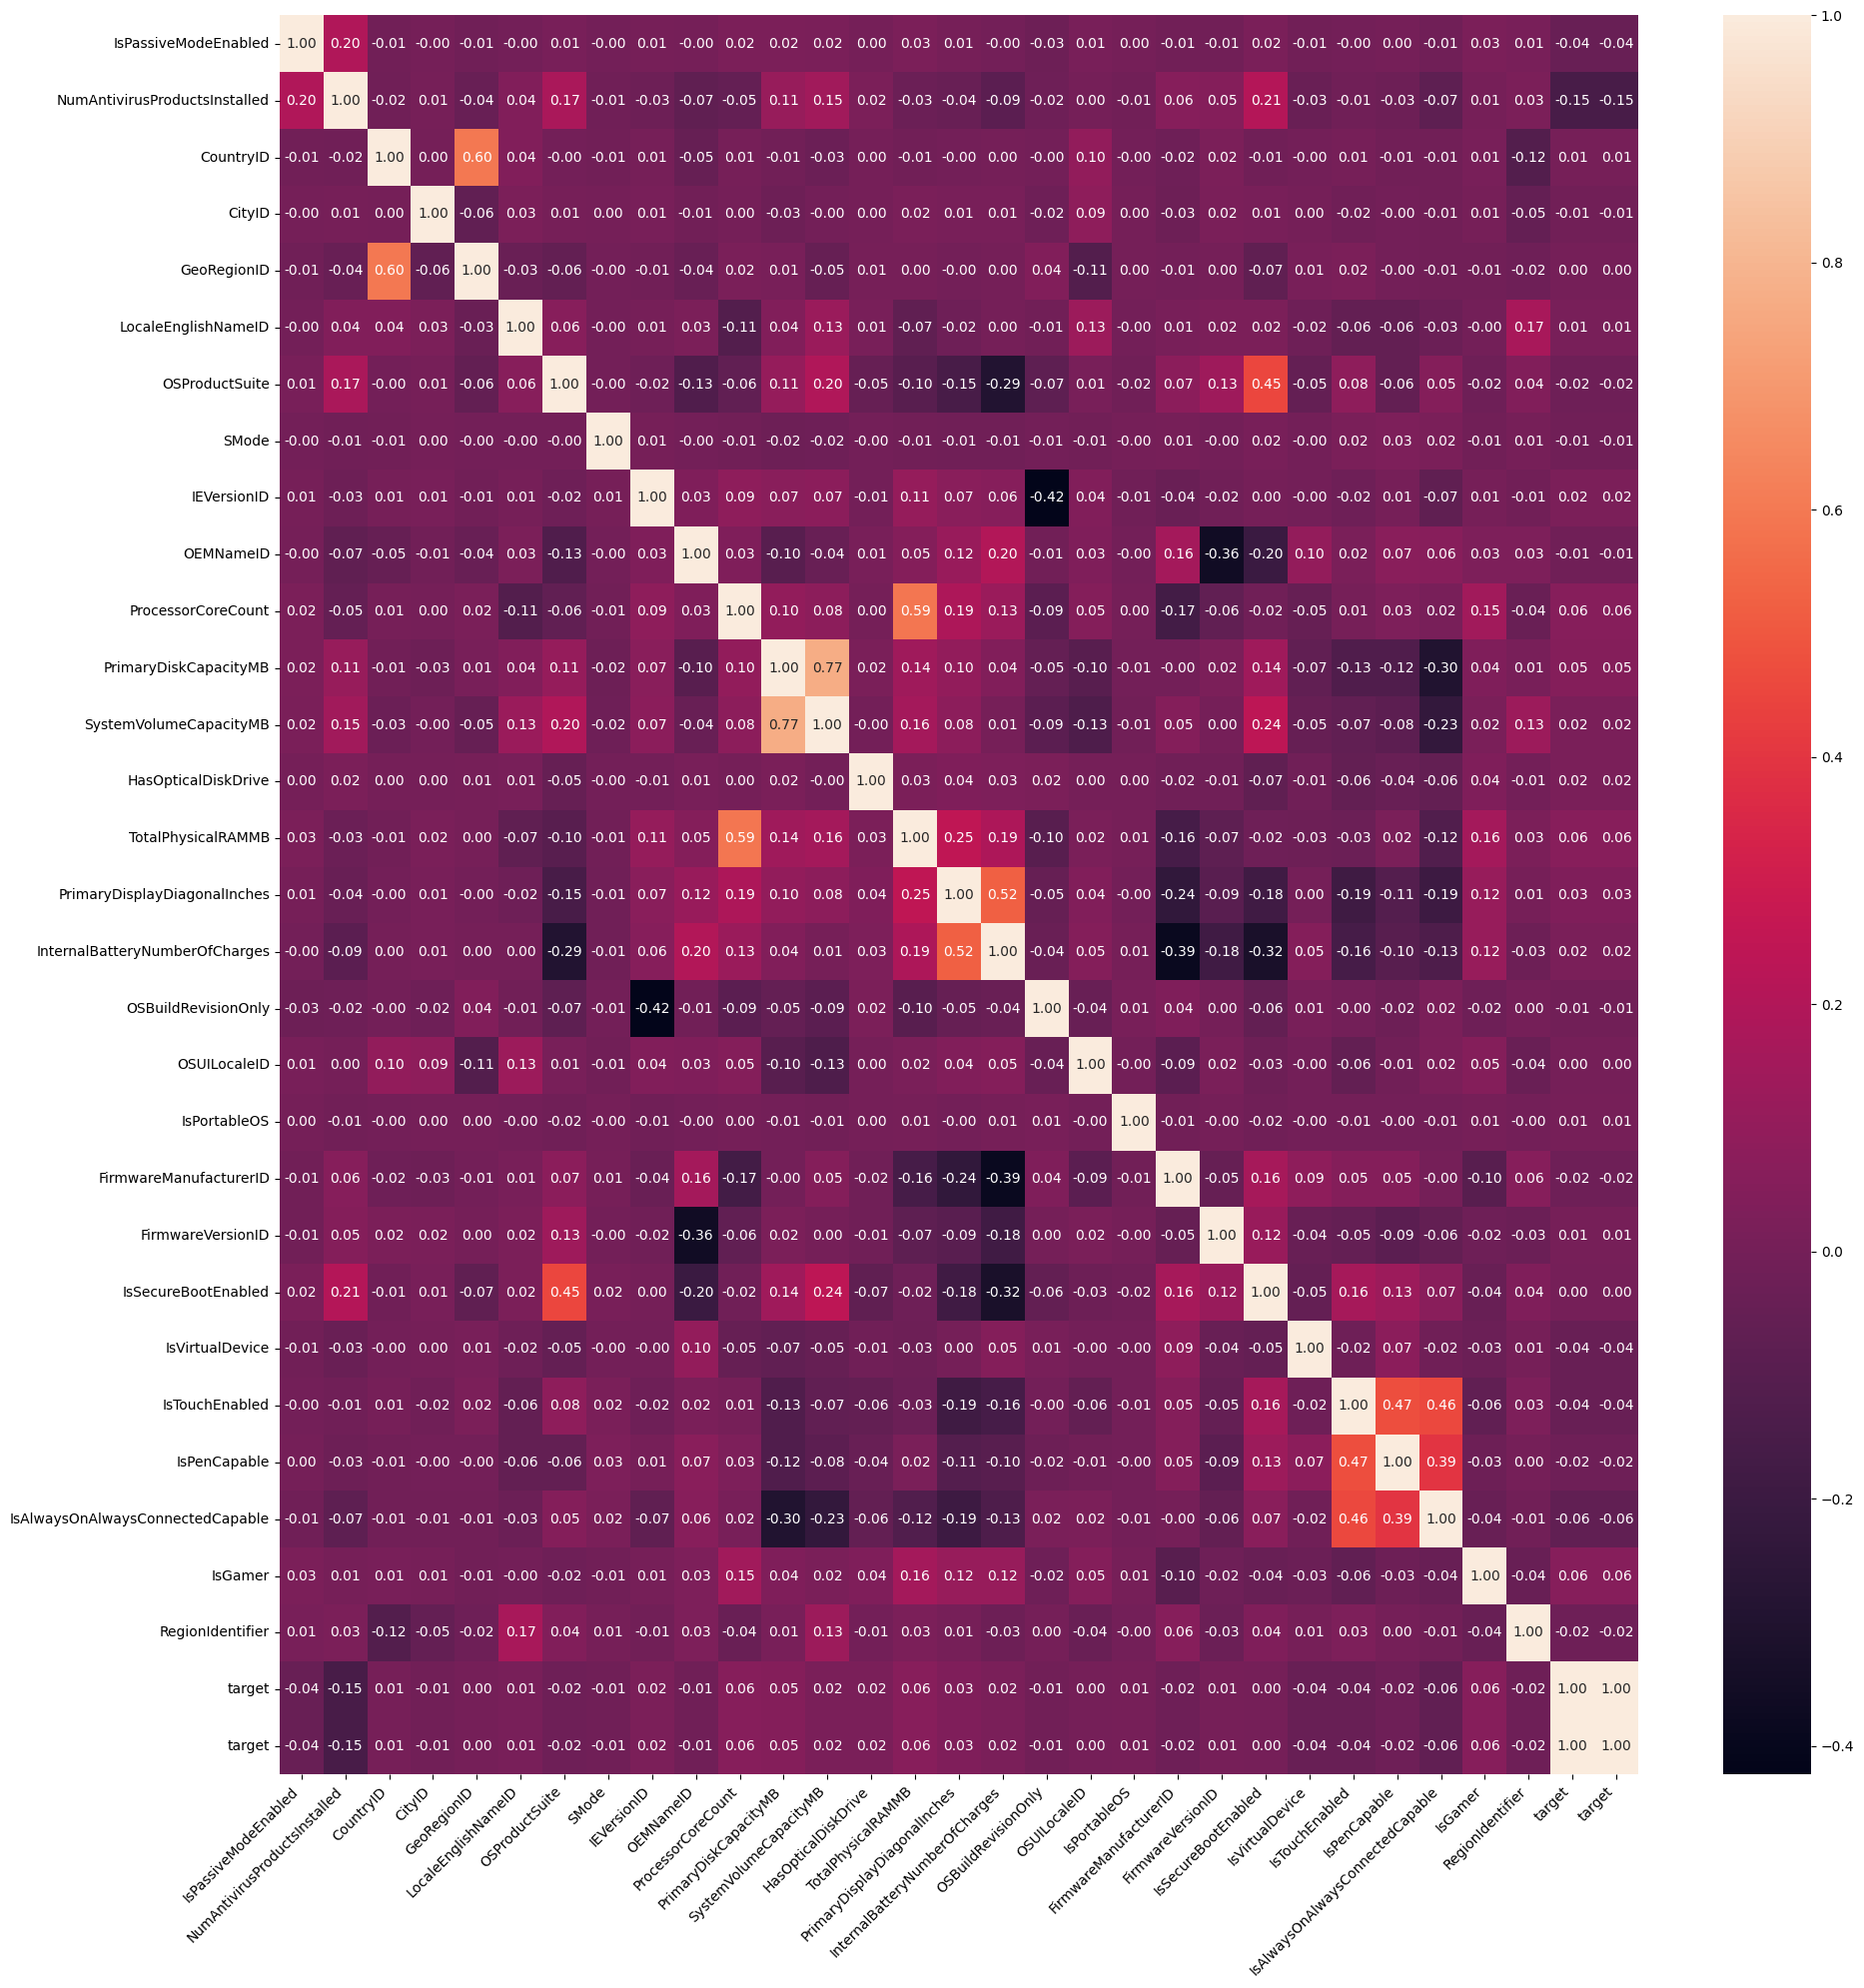

In [105]:
plt.figure(figsize=(20,20))
cm = df_train[numeric_columns.append(pd.Index(['target']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature Selection: Categorical

In [106]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train, y_train],axis=1), 'CountryID', 'target')
grouped

/home/abhishek/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total,good,bad,good_pct,bad_pct,woe,iv
CountryID,,,,,,,
0.00,23,9,14,0.00,0.00,-0.46,0.00
0.00,566,280,286,0.01,0.01,-0.04,0.00
0.01,35,16,19,0.00,0.00,-0.19,0.00
0.01,20,4,16,0.00,0.00,-1.41,0.00
0.02,1,1,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
0.98,25,13,12,0.00,0.00,0.06,0.00
0.99,14,5,9,0.00,0.00,-0.61,0.00
0.99,723,338,385,0.01,0.01,-0.15,0.00


In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74876 entries, 80629 to 20803
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MachineID                         74876 non-null  object 
 1   ProductName                       74876 non-null  object 
 2   IsPassiveModeEnabled              74876 non-null  float64
 3   NumAntivirusProductsInstalled     74876 non-null  float64
 4   CountryID                         74876 non-null  float64
 5   CityID                            74876 non-null  float64
 6   GeoRegionID                       74876 non-null  float64
 7   LocaleEnglishNameID               74876 non-null  float64
 8   PlatformType                      74876 non-null  object 
 9   OSVersion                         74876 non-null  object 
 10  OSProductSuite                    74876 non-null  float64
 11  OsPlatformSubRelease              74876 non-null  object 
 12  SKUEd

In [108]:
iv_values = {}

for feature in X_train.columns:
    if X_train[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train, y_train],axis=1), feature, 'target' )
    else:
        X_binned = pd.cut(X_train[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'target' )
    iv_values[feature] = iv
        
iv_values

/home/abhishek/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/abhishek/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/abhishek/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/abhishek/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/abhishek/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/abhishek/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399:

{'MachineID': 0.0,
 'ProductName': 0.00010996657555778399,
 'IsPassiveModeEnabled': 0.007773801289412376,
 'NumAntivirusProductsInstalled': 0.09765171025878434,
 'CountryID': 0.0013655910679341624,
 'CityID': 0.0013672026949851004,
 'GeoRegionID': 0.0019170977390007059,
 'LocaleEnglishNameID': 0.005199935609244609,
 'PlatformType': 0.00036760880429331105,
 'OSVersion': 0.00013662698748815233,
 'OSProductSuite': 0.0017525392389194185,
 'OsPlatformSubRelease': 0.011187125876149277,
 'SKUEditionName': 0.0024167277991702643,
 'SMode': 0.00101918987581207,
 'IEVersionID': 0.006721330205043483,
 'MDC2FormFactor': 0.024410145257730775,
 'DeviceFamily': 0.00023095367200694333,
 'OEMNameID': 0.0032055000845157087,
 'ProcessorCoreCount': 0.007808007697438049,
 'PrimaryDiskCapacityMB': 0.00745952631530019,
 'PrimaryDiskType': 0.0026421526847519162,
 'SystemVolumeCapacityMB': 0.0006130910096394577,
 'HasOpticalDiskDrive': 0.0016436040847606652,
 'TotalPhysicalRAMMB': 0.0001951791643867367,
 'Chass

In [109]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
3,NumAntivirusProductsInstalled,0.098
15,MDC2FormFactor,0.024
28,OSArchitecture,0.022
26,PowerPlatformRole,0.018
29,OSBranch,0.017
46,IsAlwaysOnAlwaysConnectedCapable,0.016
24,ChassisType,0.015
47,IsGamer,0.014
33,OSInstallType,0.012
11,OsPlatformSubRelease,0.011


In [110]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['NumAntivirusProductsInstalled', 'MDC2FormFactor', 'OSArchitecture']

# Feature incoding

In [111]:
X_train_reduced = X_train[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [112]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,NumAntivirusProductsInstalled,MDC2FormFactor_Convertible,MDC2FormFactor_Desktop,MDC2FormFactor_Detachable,MDC2FormFactor_LargeServer,MDC2FormFactor_LargeTablet,MDC2FormFactor_MediumServer,MDC2FormFactor_Notebook,MDC2FormFactor_PCOther,MDC2FormFactor_SmallServer,MDC2FormFactor_SmallTablet,OSArchitecture_arm64,OSArchitecture_x86
80629,0.000,False,False,False,False,False,False,True,False,False,False,False,False
11123,0.250,False,True,False,False,False,False,False,False,False,False,False,False
69089,0.500,True,False,False,False,False,False,False,False,False,False,False,False


In [113]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,NumAntivirusProductsInstalled
28433,NaN
47225,NaN
71200,NaN


In [ ]:
X_train.head()

,MachineID,ProductName,IsPassiveModeEnabled,NumAntivirusProductsInstalled,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,OSVersion,...,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
80629,49434133ccae28a991edd4bb5f943b86,win8defender,0.000,0.000,0.077,0.223,0.932,0.264,windows10,10.0.0.0,...,Retail,0.511,0.458,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11123,95a360d560a96afd3399c6c7700bdd8e,win8defender,0.000,0.250,0.303,0.113,0.932,0.264,windows10,10.0.0.0,...,Retail,0.461,0.232,0.000,0.000,0.000,0.000,0.000,1.000,0.786
69089,7b7073fbc16d65d0bd9e621c7a733102,win8defender,0.000,0.500,0.403,0.237,0.414,0.236,windows10,10.0.0.0,...,Retail,0.511,0.458,1.000,0.000,1.000,1.000,0.000,0.000,1.000
85267,82882d584c4c3ffad74ed124e72eb1ad,win8defender,0.000,0.000,0.638,0.735,0.529,0.243,windows10,10.0.0.0,...,Retail,0.130,0.961,1.000,0.000,0.000,0.000,0.000,0.000,0.000
58973,b0ec570e1186ee796f5e04a5055041c5,win8defender,0.000,0.000,0.127,0.717,0.115,0.616,windows10,10.0.0.0,...,Retail,0.511,0.458,1.000,0.000,0.000,0.000,0.000,0.000,0.643


# Model Building

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)



LogisticRegression()

In [70]:
X_test_encoded.isna().sum()

NumAntivirusProductsInstalled    24
MDC2FormFactor_Convertible        0
MDC2FormFactor_Desktop            0
MDC2FormFactor_Detachable         0
MDC2FormFactor_LargeServer        0
MDC2FormFactor_LargeTablet        0
MDC2FormFactor_MediumServer       0
MDC2FormFactor_Notebook           0
MDC2FormFactor_PCOther            0
MDC2FormFactor_SmallServer        0
MDC2FormFactor_SmallTablet        0
OSArchitecture_arm64              0
OSArchitecture_x86                0
dtype: int64

In [ ]:
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

In [72]:
X_test_encoded.NumAntivirusProductsInstalled.value_counts()

NumAntivirusProductsInstalled
0.000    17381
0.250     6960
0.500      570
0.750       24
Name: count, dtype: int64

In [74]:
X_train_encoded.shape

(74876, 13)